1) Текстовое описание набора данных 

Этот набор относится к красным вариантам португальского вина "Vinho Verde". Из-за проблем с конфиденциальностью и логистикой доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, нет данных о сортах винограда, марке вина, цене продажи вина и т.д.).

Наборы данных можно рассматривать как задачи классификации или регрессии. Сорта упорядочены и не сбалансированы (например, нормальных вин гораздо больше, чем отличных или плохих).

Входные переменные (на основе физико-химических тестов):
1 - фиксированная кислотность
2 - летучая кислотность
3 - лимонная кислота
4 - остаточный сахар
5 - хлориды
6 - свободный диоксид серы
7 - общий диоксид серы
8 - плотность
9 - pH
10 - сульфаты
11 - алкоголь
Выходная переменная (на основе сенсорных данных):
12 - качество (оценка от 0 до 10)

Определим, какие физико-химические свойства делают вино "хорошим"!

ИМПОРТ БИБЛИОТЕК

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('winequality-red.csv')

2. Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

fixed acidity 
 volatile acidity 
 citric acid 
 residual sugar 
 chlorides 
 free sulfur dioxide 
 total sulfur dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 quality 
 
 
 
 
 0 
 7.4 
 0.70 
 0.00 
 1.9 
 0.076 
 11.0 
 34.0 
 0.9978 
 3.51 
 0.56 
 9.4 
 5 
 
 
 1 
 7.8 
 0.88 
 0.00 
 2.6 
 0.098 
 25.0 
 67.0 
 0.9968 
 3.20 
 0.68 
 9.8 
 5 
 
 
 2 
 7.8 
 0.76 
 0.04 
 2.3 
 0.092 
 15.0 
 54.0 
 0.9970 
 3.26 
 0.65 
 9.8 
 5 
 
 
 3 
 11.2 
 0.28 
 0.56 
 1.9 
 0.075 
 17.0 
 60.0 
 0.9980 
 3.16 
 0.58 
 9.8 
 6 
 
 
 4 
 7.4 
 0.70 
 0.00 
 1.9 
 0.076 
 11.0 
 34.0 
 0.9978 
 3.51 
 0.56 
 9.4 
 5

In [4]:
# Размер датасета
data.shape

(1599, 12)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1599


In [6]:
# Список колонок
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

fixed acidity 
 volatile acidity 
 citric acid 
 residual sugar 
 chlorides 
 free sulfur dioxide 
 total sulfur dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 quality 
 
 
 
 
 count 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 1599.000000 
 
 
 mean 
 8.319637 
 0.527821 
 0.270976 
 2.538806 
 0.087467 
 15.874922 
 46.467792 
 0.996747 
 3.311113 
 0.658149 
 10.422983 
 5.636023 
 
 
 std 
 1.741096 
 0.179060 
 0.194801 
 1.409928 
 0.047065 
 10.460157 
 32.895324 
 0.001887 
 0.154386 
 0.169507 
 1.065668 
 0.807569 
 
 
 min 
 4.600000 
 0.120000 
 0.000000 
 0.900000 
 0.012000 
 1.000000 
 6.000000 
 0.990070 
 2.740000 
 0.330000 
 8.400000 
 3.000000 
 
 
 25% 
 7.100000 
 0.390000 
 0.090000 
 1.900000 
 0.070000 
 7.000000 
 22.000000 
 0.995600 
 3.210000 
 0.550000 
 9.500000 
 5.000000 
 
 
 50% 
 7.900000 
 0.520000 
 0.260000 
 2.200000 
 0.079000 
 14.000000 
 38.000000 
 0.996750 
 3.310000 
 0.620000 
 10.200000 
 6.000000 
 
 
 75% 
 9.200000 
 0.640000 
 0.420000 
 2.600000 
 0.090000 
 21.000000 
 62.000000 
 0.997835 
 3.400000 
 0.730000 
 11.100000 
 6.000000 
 
 
 max 
 15.900000 
 1.580000 
 1.000000 
 15.500000 
 0.611000 
 72.000000 
 289.000000 
 1.003690 
 4.010000 
 2.000000 
 14.900000 
 8.000000

In [10]:
# Определим уникальные значения для целевого признака
data['quality'].unique()

3. Визуальное исследование датасета

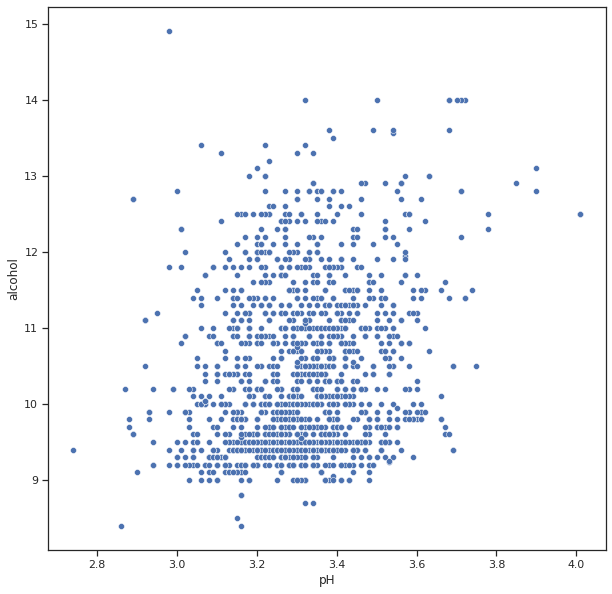

In [11]:
#Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='pH', y='alcohol', data=data)

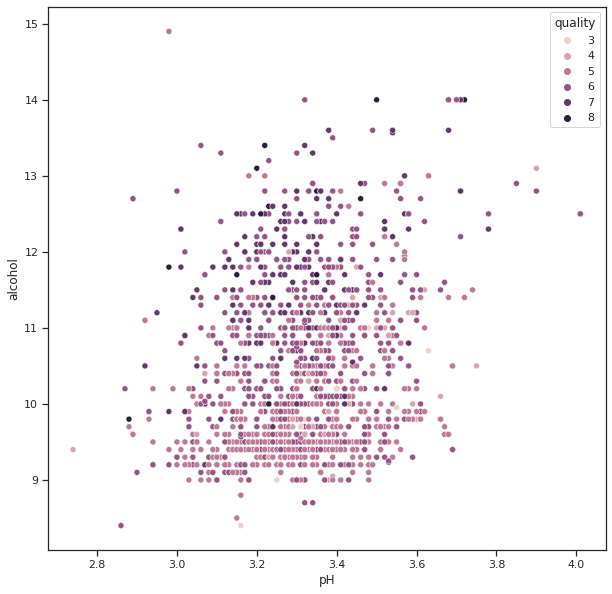

In [12]:
#Целевой признак
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='pH', y='alcohol', data=data, hue='quality')

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


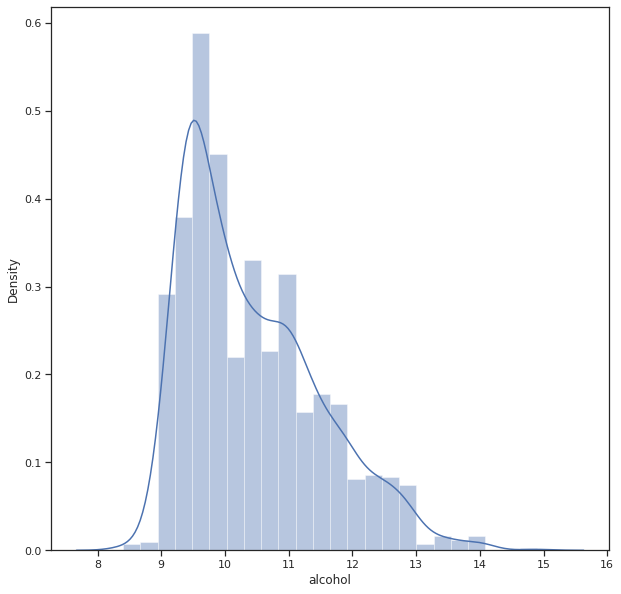

In [13]:
#Гистограмма

fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['alcohol'])

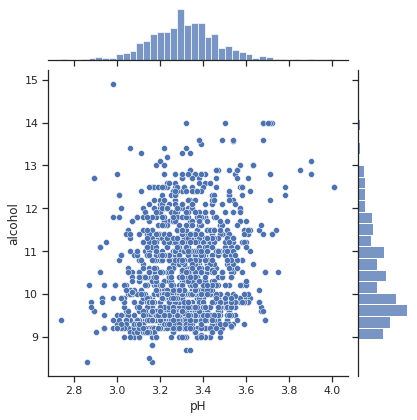

In [14]:
#Jointplot
sns.jointplot(x='pH', y='alcohol', data=data)

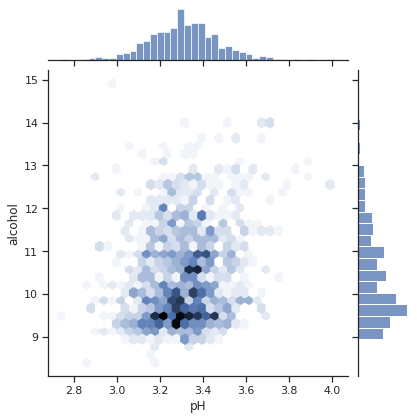

In [15]:
sns.jointplot(x='pH', y='alcohol', data=data, kind="hex")

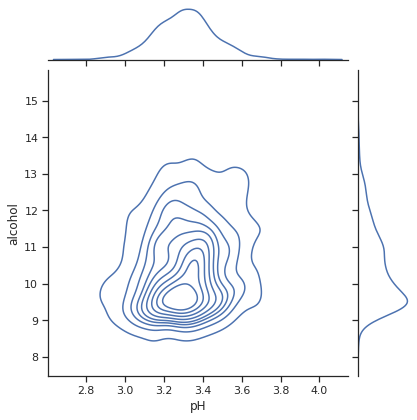

In [17]:
sns.jointplot(x='pH', y='alcohol', data=data, kind="kde")

Парные диаграммы

Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

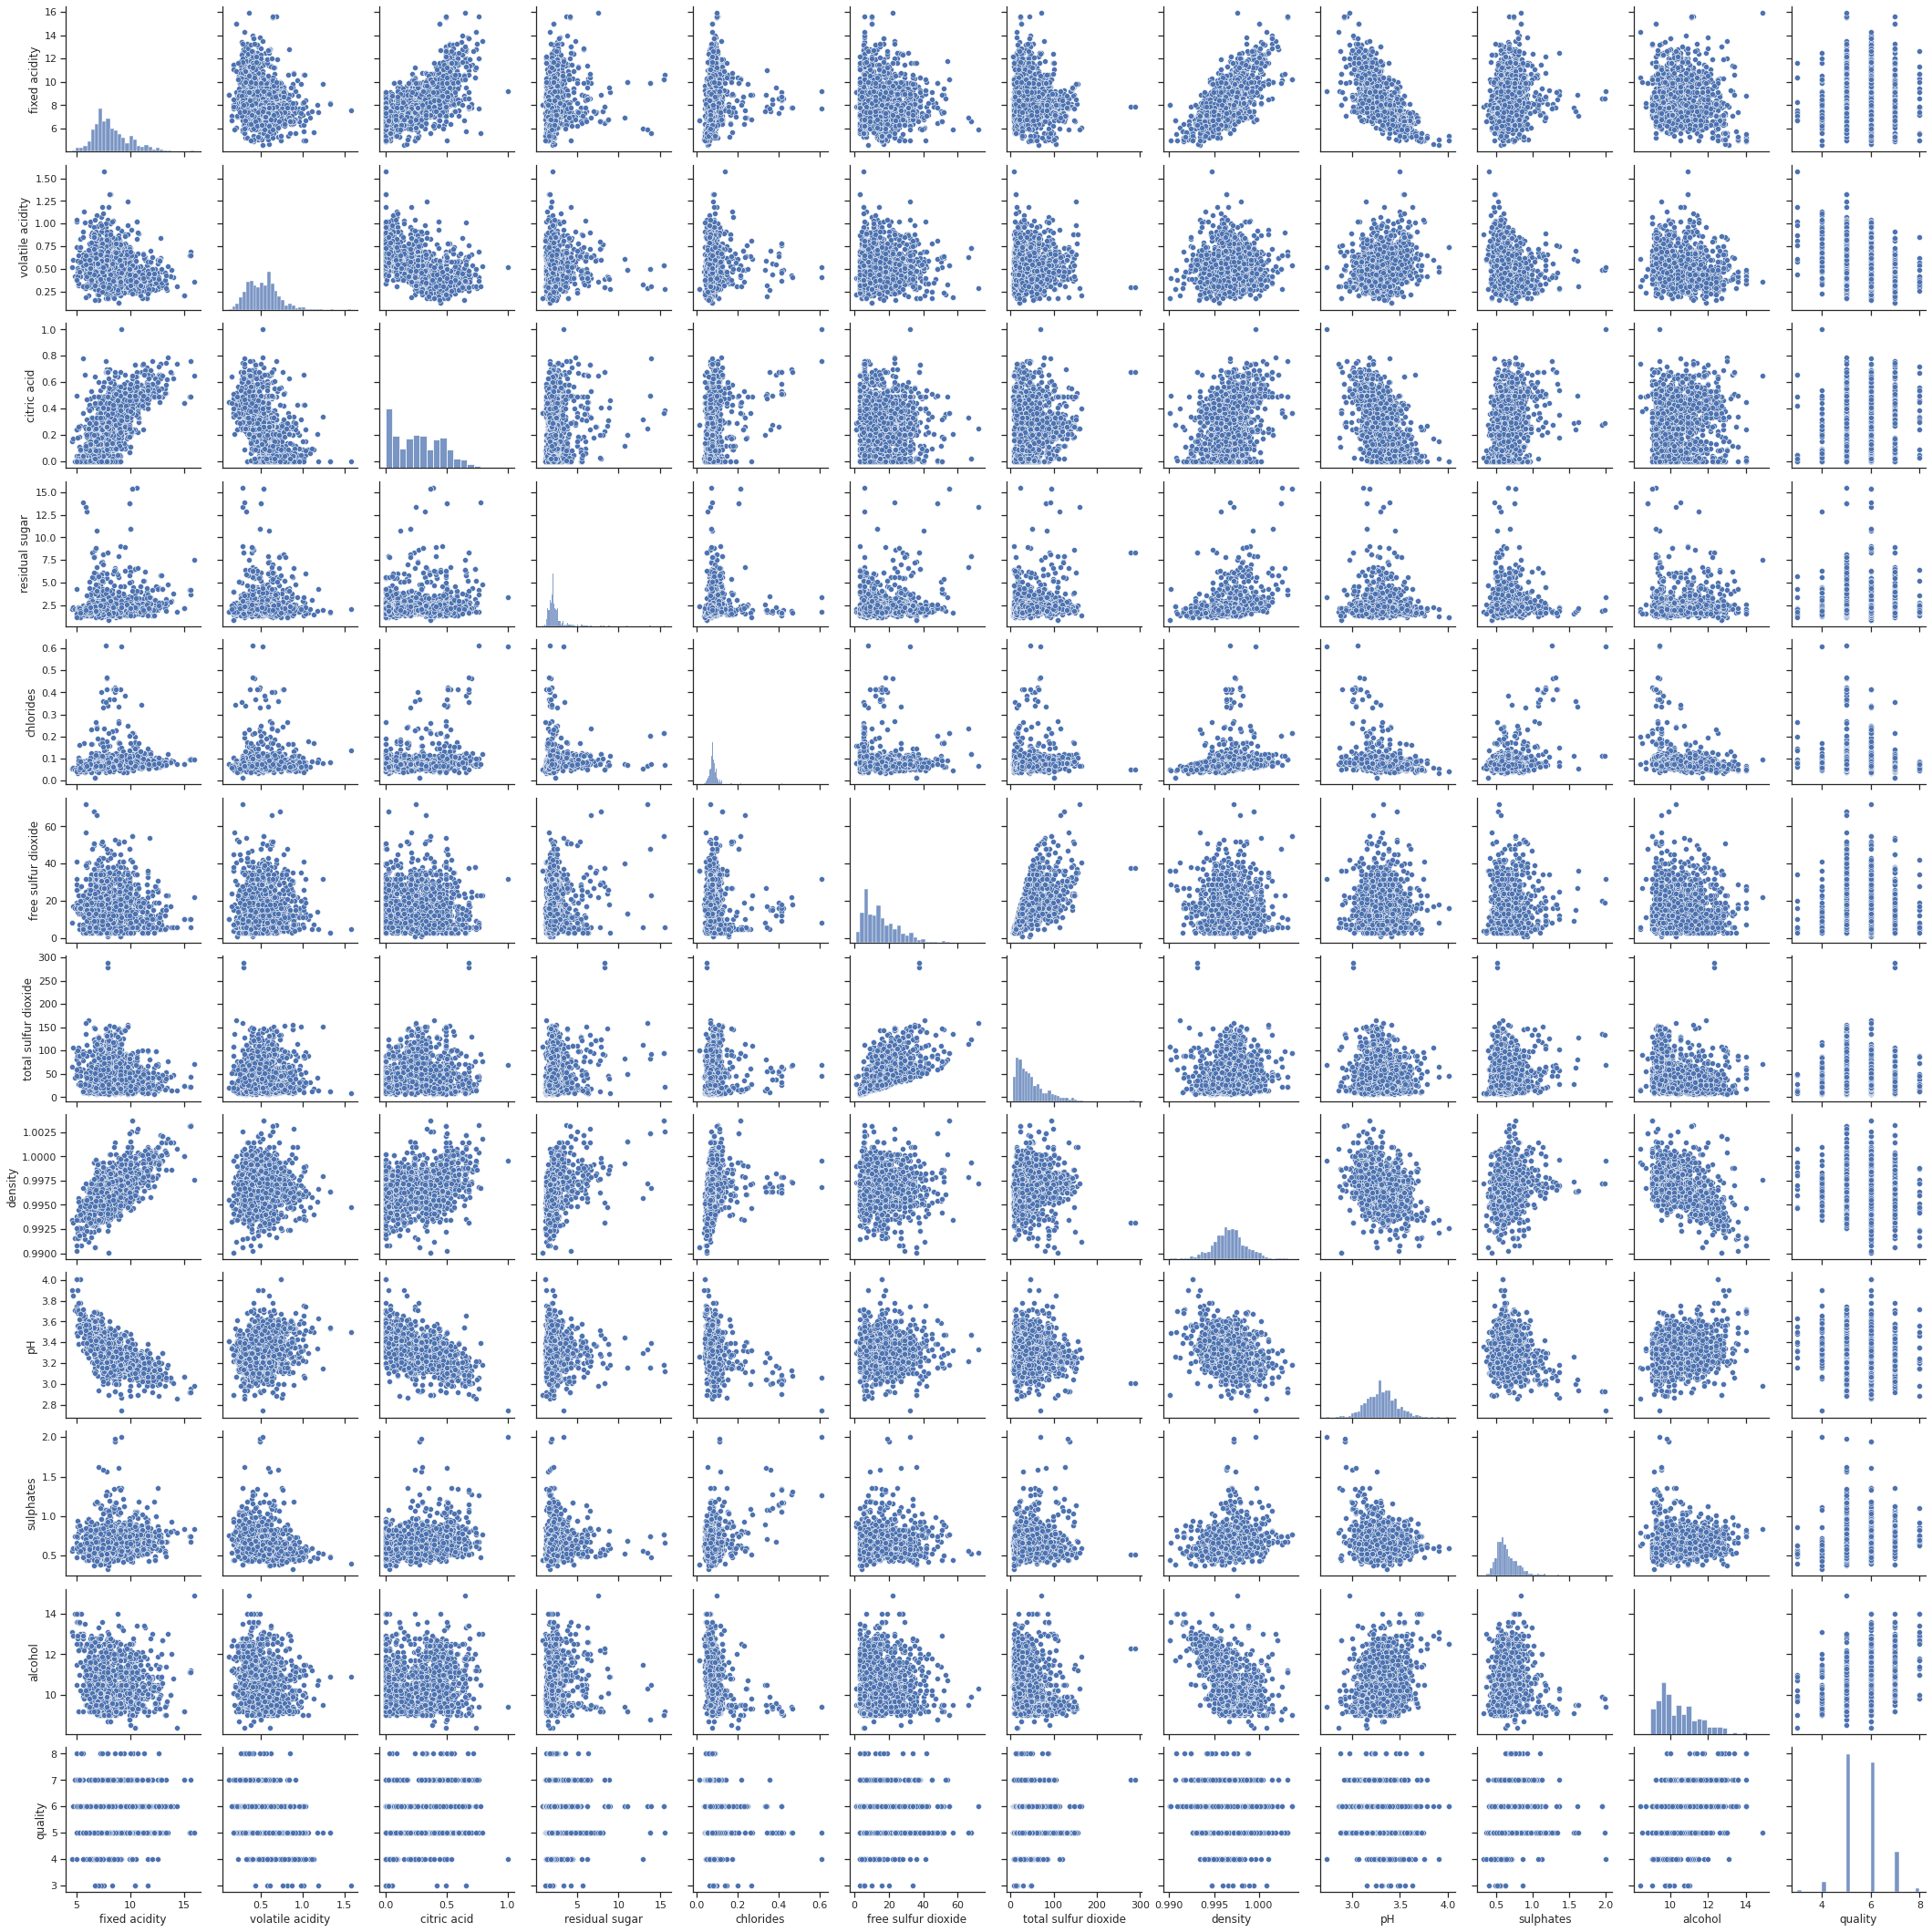

In [19]:
sns.pairplot(data)

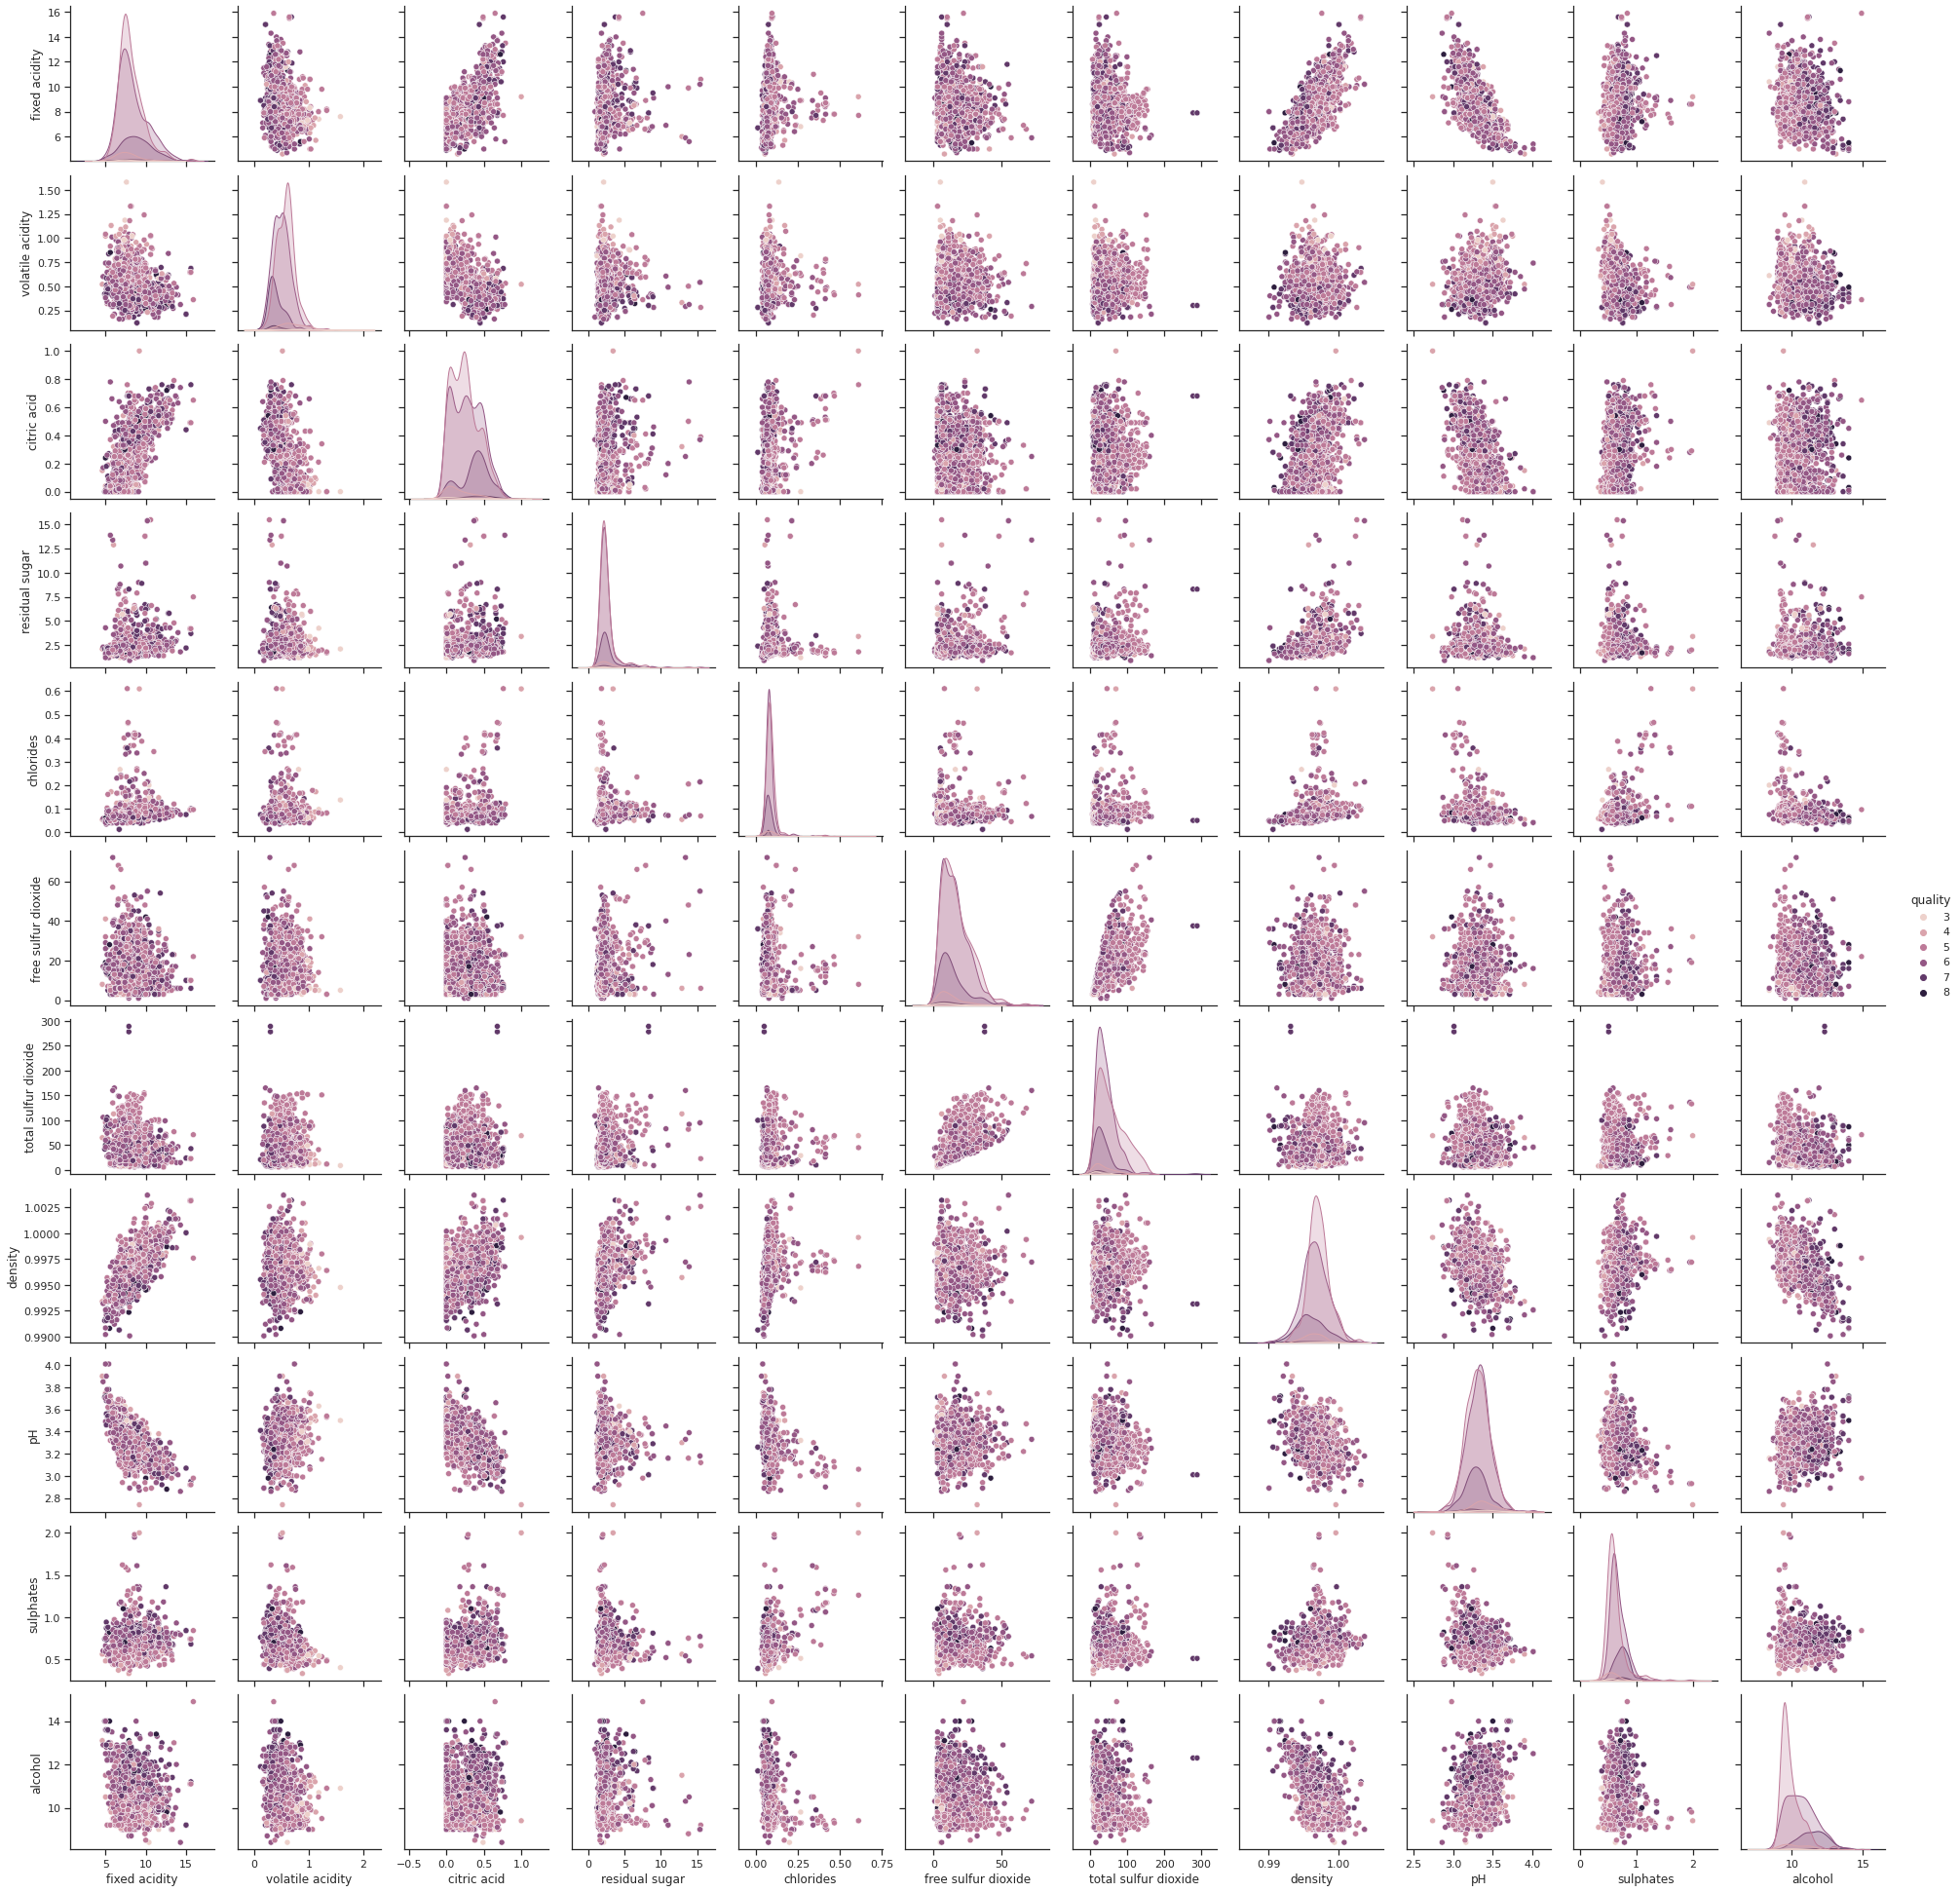

In [20]:
#С помощью параметра "hue" возможна группировка по значениям какого-либо признака.
sns.pairplot(data, hue="quality")

Ящик с усами

Отображает одномерное распределение вероятности.

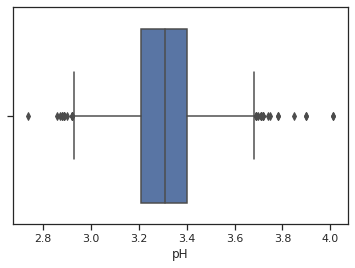

In [21]:
sns.boxplot(x=data['pH'])

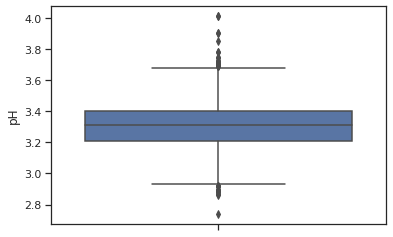

In [22]:
# По вертикали
sns.boxplot(y=data['pH'])

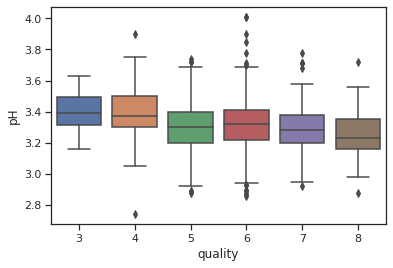

In [23]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='quality', y='pH', data=data)

Violin plot

Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

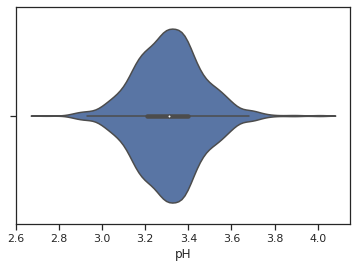

In [24]:
sns.violinplot(x=data['pH'])

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


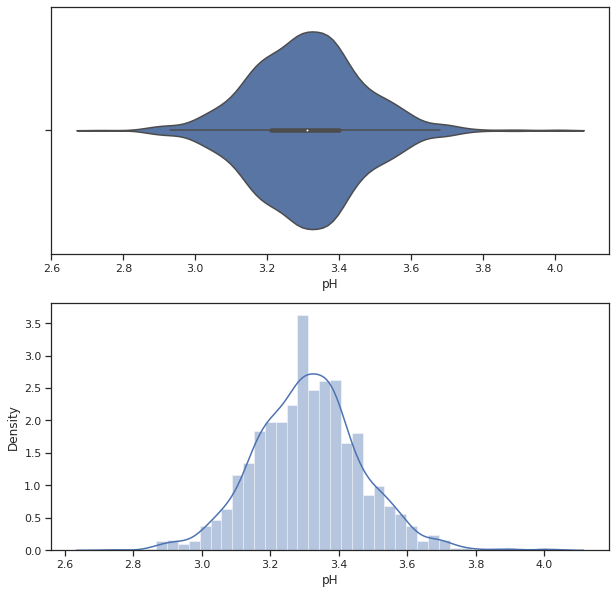

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['pH'])
sns.distplot(data['pH'], ax=ax[1])

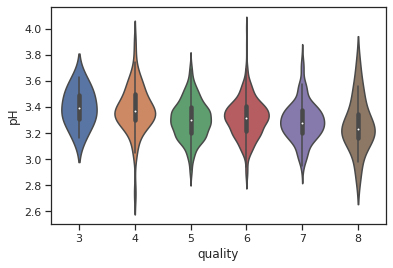

In [26]:
# Распределение параметра pH сгруппированные по quality.
sns.violinplot(x='quality', y='pH', data=data)

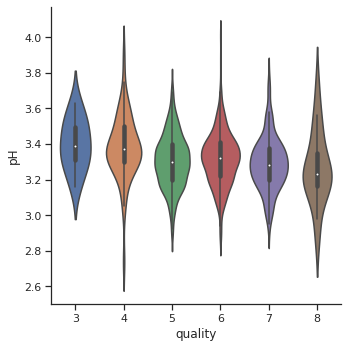

In [27]:
sns.catplot(y='pH', x='quality', data=data, kind="violin", split=True)

4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "quality"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [28]:
data.corr()

fixed acidity 
 volatile acidity 
 citric acid 
 residual sugar 
 chlorides 
 free sulfur dioxide 
 total sulfur dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 quality 
 
 
 
 
 fixed acidity 
 1.000000 
 -0.256131 
 0.671703 
 0.114777 
 0.093705 
 -0.153794 
 -0.113181 
 0.668047 
 -0.682978 
 0.183006 
 -0.061668 
 0.124052 
 
 
 volatile acidity 
 -0.256131 
 1.000000 
 -0.552496 
 0.001918 
 0.061298 
 -0.010504 
 0.076470 
 0.022026 
 0.234937 
 -0.260987 
 -0.202288 
 -0.390558 
 
 
 citric acid 
 0.671703 
 -0.552496 
 1.000000 
 0.143577 
 0.203823 
 -0.060978 
 0.035533 
 0.364947 
 -0.541904 
 0.312770 
 0.109903 
 0.226373 
 
 
 residual sugar 
 0.114777 
 0.001918 
 0.143577 
 1.000000 
 0.055610 
 0.187049 
 0.203028 
 0.355283 
 -0.085652 
 0.005527 
 0.042075 
 0.013732 
 
 
 chlorides 
 0.093705 
 0.061298 
 0.203823 
 0.055610 
 1.000000 
 0.005562 
 0.047400 
 0.200632 
 -0.265026 
 0.371260 
 -0.221141 
 -0.128907 
 
 
 free sulfur dioxide 
 -0.153794 
 -0.010504 
 -0.060978 
 0.187049 
 0.005562 
 1.000000 
 0.667666 
 -0.021946 
 0.070377 
 0.051658 
 -0.069408 
 -0.050656 
 
 
 total sulfur dioxide 
 -0.113181 
 0.076470 
 0.035533 
 0.203028 
 0.047400 
 0.667666 
 1.000000 
 0.071269 
 -0.066495 
 0.042947 
 -0.205654 
 -0.185100 
 
 
 density 
 0.668047 
 0.022026 
 0.364947 
 0.355283 
 0.200632 
 -0.021946 
 0.071269 
 1.000000 
 -0.341699 
 0.148506 
 -0.496180 
 -0.174919 
 
 
 pH 
 -0.682978 
 0.234937 
 -0.541904 
 -0.085652 
 -0.265026 
 0.070377 
 -0.066495 
 -0.341699 
 1.000000 
 -0.196648 
 0.205633 
 -0.057731 
 
 
 sulphates 
 0.183006 
 -0.260987 
 0.312770 
 0.005527 
 0.371260 
 0.051658 
 0.042947 
 0.148506 
 -0.196648 
 1.000000 
 0.093595 
 0.251397 
 
 
 alcohol 
 -0.061668 
 -0.202288 
 0.109903 
 0.042075 
 -0.221141 
 -0.069408 
 -0.205654 
 -0.496180 
 0.205633 
 0.093595 
 1.000000 
 0.476166 
 
 
 quality 
 0.124052 
 -0.390558 
 0.226373 
 0.013732 
 -0.128907 
 -0.050656 
 -0.185100 
 -0.174919 
 -0.057731 
 0.251397 
 0.476166 
 1.000000

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

Целевой признак наиболее сильно коррелирует с алкоголем (0.48) и сульфатами (0.25). Эти признаки обязательно следует оставить в модели.
Целевой признак отчасти коррелирует с лимонной кислотой (0.22). Этот признак стоит также оставить в модели.
Целевой признак слабо коррелирует с параметрами, у которых отрицательная корреляция. Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

Плотность и фиксированная кислотность очень сильно коррелируют между собой (0.66). Поэтому из этих признаков в модели можно оставлять только один.
Также можно сделать вывод, что выбирая из признаков Плотность и фиксированная кислотность лучше выбрать фиксированную кислотность, потому что она сильнее коррелирована с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее. Но для этой пары признаков этот вывод нельзя считать надежным, потому что и 0.12 и -0.17 являются довольно малыми величинами.
Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [29]:
data.corr(method='pearson')

fixed acidity 
 volatile acidity 
 citric acid 
 residual sugar 
 chlorides 
 free sulfur dioxide 
 total sulfur dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 quality 
 
 
 
 
 fixed acidity 
 1.000000 
 -0.256131 
 0.671703 
 0.114777 
 0.093705 
 -0.153794 
 -0.113181 
 0.668047 
 -0.682978 
 0.183006 
 -0.061668 
 0.124052 
 
 
 volatile acidity 
 -0.256131 
 1.000000 
 -0.552496 
 0.001918 
 0.061298 
 -0.010504 
 0.076470 
 0.022026 
 0.234937 
 -0.260987 
 -0.202288 
 -0.390558 
 
 
 citric acid 
 0.671703 
 -0.552496 
 1.000000 
 0.143577 
 0.203823 
 -0.060978 
 0.035533 
 0.364947 
 -0.541904 
 0.312770 
 0.109903 
 0.226373 
 
 
 residual sugar 
 0.114777 
 0.001918 
 0.143577 
 1.000000 
 0.055610 
 0.187049 
 0.203028 
 0.355283 
 -0.085652 
 0.005527 
 0.042075 
 0.013732 
 
 
 chlorides 
 0.093705 
 0.061298 
 0.203823 
 0.055610 
 1.000000 
 0.005562 
 0.047400 
 0.200632 
 -0.265026 
 0.371260 
 -0.221141 
 -0.128907 
 
 
 free sulfur dioxide 
 -0.153794 
 -0.010504 
 -0.060978 
 0.187049 
 0.005562 
 1.000000 
 0.667666 
 -0.021946 
 0.070377 
 0.051658 
 -0.069408 
 -0.050656 
 
 
 total sulfur dioxide 
 -0.113181 
 0.076470 
 0.035533 
 0.203028 
 0.047400 
 0.667666 
 1.000000 
 0.071269 
 -0.066495 
 0.042947 
 -0.205654 
 -0.185100 
 
 
 density 
 0.668047 
 0.022026 
 0.364947 
 0.355283 
 0.200632 
 -0.021946 
 0.071269 
 1.000000 
 -0.341699 
 0.148506 
 -0.496180 
 -0.174919 
 
 
 pH 
 -0.682978 
 0.234937 
 -0.541904 
 -0.085652 
 -0.265026 
 0.070377 
 -0.066495 
 -0.341699 
 1.000000 
 -0.196648 
 0.205633 
 -0.057731 
 
 
 sulphates 
 0.183006 
 -0.260987 
 0.312770 
 0.005527 
 0.371260 
 0.051658 
 0.042947 
 0.148506 
 -0.196648 
 1.000000 
 0.093595 
 0.251397 
 
 
 alcohol 
 -0.061668 
 -0.202288 
 0.109903 
 0.042075 
 -0.221141 
 -0.069408 
 -0.205654 
 -0.496180 
 0.205633 
 0.093595 
 1.000000 
 0.476166 
 
 
 quality 
 0.124052 
 -0.390558 
 0.226373 
 0.013732 
 -0.128907 
 -0.050656 
 -0.185100 
 -0.174919 
 -0.057731 
 0.251397 
 0.476166 
 1.000000

In [30]:
data.corr(method='kendall')

fixed acidity 
 volatile acidity 
 citric acid 
 residual sugar 
 chlorides 
 free sulfur dioxide 
 total sulfur dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 quality 
 
 
 
 
 fixed acidity 
 1.000000 
 -0.185197 
 0.484271 
 0.155029 
 0.176043 
 -0.119301 
 -0.056879 
 0.457461 
 -0.527832 
 0.141343 
 -0.048870 
 0.087966 
 
 
 volatile acidity 
 -0.185197 
 1.000000 
 -0.428354 
 0.022407 
 0.109608 
 0.012573 
 0.063701 
 0.015913 
 0.158746 
 -0.228888 
 -0.151839 
 -0.300779 
 
 
 citric acid 
 0.484271 
 -0.428354 
 1.000000 
 0.123007 
 0.076729 
 -0.049804 
 0.011645 
 0.245729 
 -0.389752 
 0.226669 
 0.064004 
 0.167318 
 
 
 residual sugar 
 0.155029 
 0.022407 
 0.123007 
 1.000000 
 0.152415 
 0.052682 
 0.102265 
 0.295986 
 -0.063127 
 0.026959 
 0.081206 
 0.025744 
 
 
 chlorides 
 0.176043 
 0.109608 
 0.076729 
 0.152415 
 1.000000 
 0.000439 
 0.091610 
 0.287866 
 -0.162706 
 0.014227 
 -0.197176 
 -0.148919 
 
 
 free sulfur dioxide 
 -0.119301 
 0.012573 
 -0.049804 
 0.052682 
 0.000439 
 1.000000 
 0.606908 
 -0.028972 
 0.079300 
 0.031706 
 -0.056019 
 -0.045646 
 
 
 total sulfur dioxide 
 -0.056879 
 0.063701 
 0.011645 
 0.102265 
 0.091610 
 0.606908 
 1.000000 
 0.087719 
 -0.006798 
 -0.000194 
 -0.179212 
 -0.156612 
 
 
 density 
 0.457461 
 0.015913 
 0.245729 
 0.295986 
 0.287866 
 -0.028972 
 0.087719 
 1.000000 
 -0.217228 
 0.110191 
 -0.329754 
 -0.136611 
 
 
 pH 
 -0.527832 
 0.158746 
 -0.389752 
 -0.063127 
 -0.162706 
 0.079300 
 -0.006798 
 -0.217228 
 1.000000 
 -0.053568 
 0.125311 
 -0.034235 
 
 
 sulphates 
 0.141343 
 -0.228888 
 0.226669 
 0.026959 
 0.014227 
 0.031706 
 -0.000194 
 0.110191 
 -0.053568 
 1.000000 
 0.143745 
 0.299270 
 
 
 alcohol 
 -0.048870 
 -0.151839 
 0.064004 
 0.081206 
 -0.197176 
 -0.056019 
 -0.179212 
 -0.329754 
 0.125311 
 0.143745 
 1.000000 
 0.380367 
 
 
 quality 
 0.087966 
 -0.300779 
 0.167318 
 0.025744 
 -0.148919 
 -0.045646 
 -0.156612 
 -0.136611 
 -0.034235 
 0.299270 
 0.380367 
 1.000000

In [31]:
data.corr(method='spearman')

fixed acidity 
 volatile acidity 
 citric acid 
 residual sugar 
 chlorides 
 free sulfur dioxide 
 total sulfur dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 quality 
 
 
 
 
 fixed acidity 
 1.000000 
 -0.278282 
 0.661708 
 0.220701 
 0.250904 
 -0.175137 
 -0.088417 
 0.623071 
 -0.706674 
 0.212654 
 -0.066576 
 0.114084 
 
 
 volatile acidity 
 -0.278282 
 1.000000 
 -0.610259 
 0.032386 
 0.158770 
 0.021163 
 0.094110 
 0.025014 
 0.233572 
 -0.325584 
 -0.224932 
 -0.380647 
 
 
 citric acid 
 0.661708 
 -0.610259 
 1.000000 
 0.176417 
 0.112577 
 -0.076452 
 0.009400 
 0.352285 
 -0.548026 
 0.331074 
 0.096456 
 0.213481 
 
 
 residual sugar 
 0.220701 
 0.032386 
 0.176417 
 1.000000 
 0.212959 
 0.074618 
 0.145375 
 0.422266 
 -0.089971 
 0.038332 
 0.116548 
 0.032048 
 
 
 chlorides 
 0.250904 
 0.158770 
 0.112577 
 0.212959 
 1.000000 
 0.000805 
 0.130033 
 0.411390 
 -0.234361 
 0.020825 
 -0.284504 
 -0.189922 
 
 
 free sulfur dioxide 
 -0.175137 
 0.021163 
 -0.076452 
 0.074618 
 0.000805 
 1.000000 
 0.789698 
 -0.041178 
 0.115679 
 0.045862 
 -0.081367 
 -0.056901 
 
 
 total sulfur dioxide 
 -0.088417 
 0.094110 
 0.009400 
 0.145375 
 0.130033 
 0.789698 
 1.000000 
 0.129332 
 -0.009841 
 -0.000504 
 -0.257806 
 -0.196735 
 
 
 density 
 0.623071 
 0.025014 
 0.352285 
 0.422266 
 0.411390 
 -0.041178 
 0.129332 
 1.000000 
 -0.312055 
 0.161478 
 -0.462445 
 -0.177074 
 
 
 pH 
 -0.706674 
 0.233572 
 -0.548026 
 -0.089971 
 -0.234361 
 0.115679 
 -0.009841 
 -0.312055 
 1.000000 
 -0.080306 
 0.179932 
 -0.043672 
 
 
 sulphates 
 0.212654 
 -0.325584 
 0.331074 
 0.038332 
 0.020825 
 0.045862 
 -0.000504 
 0.161478 
 -0.080306 
 1.000000 
 0.207330 
 0.377060 
 
 
 alcohol 
 -0.066576 
 -0.224932 
 0.096456 
 0.116548 
 -0.284504 
 -0.081367 
 -0.257806 
 -0.462445 
 0.179932 
 0.207330 
 1.000000 
 0.478532 
 
 
 quality 
 0.114084 
 -0.380647 
 0.213481 
 0.032048 
 -0.189922 
 -0.056901 
 -0.196735 
 -0.177074 
 -0.043672 
 0.377060 
 0.478532 
 1.000000

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

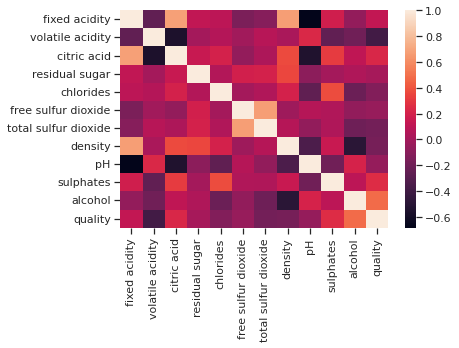

In [32]:
sns.heatmap(data.corr())

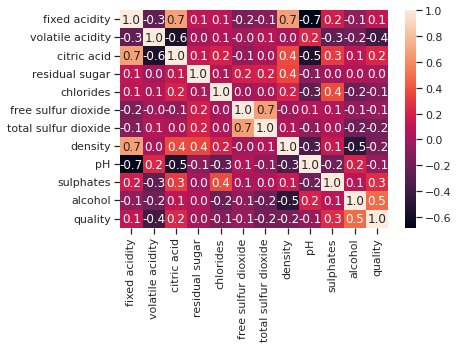

In [35]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.1f')

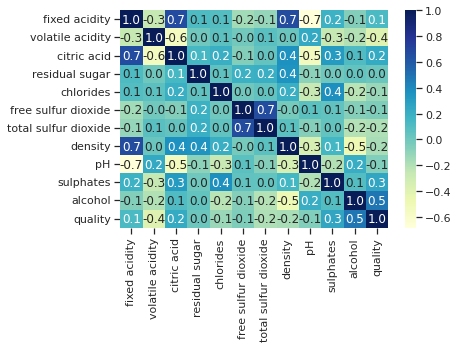

In [36]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.1f')

<ipython-input-38-fe5c80d77993>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


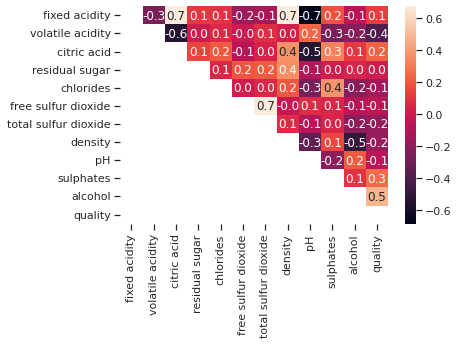

In [38]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.1f')

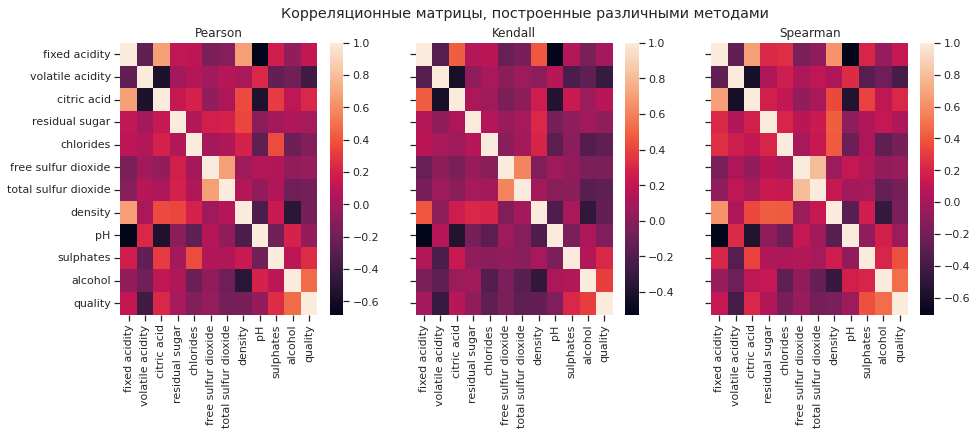

In [43]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0])
sns.heatmap(data.corr(method='kendall'), ax=ax[1])
sns.heatmap(data.corr(method='spearman'), ax=ax[2])
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками Humidity и HumidityRatio, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из двух признаков. Увидеть такие группы с помощью тепловой карты сложно.